In [7]:
#import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [10]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from graphviz import Digraph

In [11]:
data=pd.read_csv("C:/Users/alex/Desktop/Multi_class/balanced.csv")

In [12]:
#data=pd.read_csv("C:/Users/alex/Desktop/Multi_class/RF.csv")

In [13]:
data.columns

Index(['Unnamed: 0', 'Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d',
       'd101e', 'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband',
       'v013', 'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [14]:
x=data.drop(['IPV'],axis=1)
y=data['IPV']

In [15]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0)


In [17]:
# Drop unnamed Columns
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [16]:
data.columns

Index(['Unnamed: 0', 'Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d',
       'd101e', 'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband',
       'v013', 'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Media_exposure']= encoder.fit_transform(data['Media_exposure'])
data['d101a']=encoder.fit_transform(data['d101a'])
data['d101b']=encoder.fit_transform(data['d101b'])
data['d101c']=encoder.fit_transform(data['d101c'])
data['d101d']=encoder.fit_transform(data['d101d'])
data['d101e']= encoder.fit_transform(data['d101e'])
data['husband_drinks_alcohol']= encoder.fit_transform(data['husband_drinks_alcohol'])
data['d121']= encoder.fit_transform(data['d121'])
data['wife_afraid_of_husband']= encoder.fit_transform(data['wife_afraid_of_husband'])
data['v013']= encoder.fit_transform(data['v013'])
data['v024']= encoder.fit_transform(data['v024'])
data['residence']= encoder.fit_transform(data['residence'])

data['Wife_educ_level']= encoder.fit_transform(data['Wife_educ_level'])
data['religion']= encoder.fit_transform(data['religion'])
data['ethnicity']= encoder.fit_transform(data['ethnicity'])
data['no_of_H_members']= encoder.fit_transform(data['no_of_H_members'])
data['v137']= encoder.fit_transform(data['v137'])
data['v150']= encoder.fit_transform(data['v150'])

data['Sex_of_household_head']= encoder.fit_transform(data['Sex_of_household_head'])
data['v152']= encoder.fit_transform(data['v152'])
data['total_children_ever_born']= encoder.fit_transform(data['total_children_ever_born'])
data['v218']= encoder.fit_transform(data['v218'])
data['v730']= encoder.fit_transform(data['v730'])
data['v744a']= encoder.fit_transform(data['v744a'])
data['v744e']= encoder.fit_transform(data['v744e'])
data['IPV']= encoder.fit_transform(data['IPV'])





data.head()

,Unnamed: 0,Media_exposure,d101a,d101b,d101c,d101d,d101e,husband_drinks_alcohol,d121,wife_afraid_of_husband,...,v137,v150,Sex_of_household_head,v152,total_children_ever_born,v218,v730,v744a,v744e,IPV
0,0,0,0,0,0,0,0,0,0,1,...,1,3,1,45,4,4,26,1,1,0
1,1,0,0,0,0,0,0,0,0,1,...,3,0,0,28,5,5,27,1,1,0
2,2,0,0,0,0,0,0,0,0,1,...,0,0,0,40,7,7,39,1,1,0
3,3,1,0,0,0,0,1,0,0,0,...,1,0,0,20,0,0,19,1,1,0
4,4,1,0,0,0,0,0,0,0,1,...,2,0,0,15,2,2,14,1,0,0


In [58]:
x=data.drop(['IPV'],axis=1)
y=data['IPV']

In [59]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0)


In [43]:
from xgboost import XGBClassifier 
from matplotlib import pyplot as plt 
classifier = XGBClassifier() 
classifier.fit(X, Y) 
model=print(classifier.feature_importances_)

import pandas as pd
import shap

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.04427401 0.034707   0.04631039 0.03488408 0.04248539 0.03794265
 0.03215468 0.02619433 0.08298974 0.04097911 0.03314216 0.05673933
 0.0469601  0.05381727 0.03342235 0.04047016 0.03097588 0.03425351
 0.04915426 0.03195442 0.03055833 0.02974799 0.03330765 0.0444135
 0.02816173]


ModuleNotFoundError: No module named 'shap'

dvv=['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d',
       'd101e', 'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband',
       'v013', 'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity','no_of_H_members',  'v137', 'v150', 
     'Sex_of_household_head', 'v152','v744a',
        'v744e','v730','v218','total_children_ever_born','IPV']

dv=pd.read_csv("C:/Users/alex/Desktop/Multi_class/IPV21.csv",usecols=dvv)


dv.columns

In [29]:
#RF=dv.to_csv('c:/users/alex/desktop/multi_class/RF.csv')

In [30]:
#rf=pd.read_csv('c:/users/alex/desktop/multi_class/RF.csv')

In [9]:
data.columns

Index(['Unnamed: 0', 'Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d',
       'd101e', 'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband',
       'v013', 'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [32]:
# Drop unnamed Columns
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [33]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [9]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [10]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [11]:
#data=data.to_csv("C:/Users/alex/Desktop/Multi_class/IPV21.csv")

In [12]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

In [15]:
data.shape

(21835, 57)

# Train and Test Split of the whole dataset
What is Train/Test
Train/Test is a method to measure the accuracy of our model. It is called Train/Test because you split the data set into two sets: a training set and a testing set.
80% for training, and 20% for testing.
We  train the model using the training set, We  test the model using the testing set.
Train the model means create the model, Test the model means test the accuracy of the model.
<h> Random state in train and test split
   Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.


In [16]:
x=data.drop(['IPV'],axis=1)
y=data['IPV']

In [17]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0)

#### Feature Selection in Multiclass

In [16]:
# import mutual_info_classif,SelectKBest,chi2 and select feature using SelectKBest and mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,chi2
best_mi=SelectKBest(score_func=mutual_info_classif,k=21)
fit_skb_mi=best_mi.fit(x_train,y_train.values.ravel())

In [17]:
# display both best features and their matual scores
matual_scores=pd.DataFrame(fit_skb_mi.scores_)
matual_columns=pd.DataFrame(x_train.columns)

In [18]:
#concat both features and their mi_scores incase of columns
feat_mi_score=pd.concat([matual_columns,matual_scores],axis=1)

In [19]:
#display columns and mi scores
feat_mi_score.columns=["mutual_info","scores"]
feat_mi_score

,mutual_info,scores
0,Media_exposure,0.007416
1,d101a,0.004959
2,d101b,0.028086
3,d101c,0.017007
4,d101d,0.022229
5,d101e,0.004514
6,husband_drinks_alcohol,0.000000
7,d121,0.000000
8,wife_afraid_of_husband,0.040118
9,v013,0.021245


In [20]:
# select maximum of the largest 18 features depending upon their mi_scores
f_mi_score=feat_mi_score.nlargest(21,'scores')
f_mi_score

,mutual_info,scores
8,wife_afraid_of_husband,0.040118
34,husbands_occupation,0.039206
33,v701,0.038399
19,v152,0.036064
37,v730,0.035646
21,wealth_Index,0.028999
36,v716,0.028809
40,v743d,0.028694
32,v621,0.028604
11,residence,0.028233


In [21]:
#dsiplay best selected features in mi scores
mi_best=x_train.columns[best_mi.get_support()]
mi_best

Index(['d101b', 'd101d', 'wife_afraid_of_husband', 'v013', 'residence',
       'Wife_educ_level', 'ethnicity', 'v152', 'wealth_Index', 'v504',
       'age_at_Fcohabitatiion', 'v613', 'v621', 'v701', 'husbands_occupation',
       'v716', 'v730', 'v743d', 'v744a', 'v745a', 'v822'],
      dtype='object')

In [22]:
#dsiplay best selected features in mi scores
mi_best=x_train.columns[best_mi.get_support()]
mi_best

Index(['d101b', 'd101d', 'wife_afraid_of_husband', 'v013', 'residence',
       'Wife_educ_level', 'ethnicity', 'v152', 'wealth_Index', 'v504',
       'age_at_Fcohabitatiion', 'v613', 'v621', 'v701', 'husbands_occupation',
       'v716', 'v730', 'v743d', 'v744a', 'v745a', 'v822'],
      dtype='object')

In [23]:
#dsiplay best selected features in mi scores
Ma_info=x_train.columns[best_mi.get_support()]
Ma_info

Index(['d101b', 'd101d', 'wife_afraid_of_husband', 'v013', 'residence',
       'Wife_educ_level', 'ethnicity', 'v152', 'wealth_Index', 'v504',
       'age_at_Fcohabitatiion', 'v613', 'v621', 'v701', 'husbands_occupation',
       'v716', 'v730', 'v743d', 'v744a', 'v745a', 'v822'],
      dtype='object')

In [24]:
#using the mi_best features,aply the train and test set
x_train_mi_fc=x_train[Ma_info]
x_test_mi_fc=x_test[Ma_info]

In [25]:
x_train_mi_fc

,d101b,d101d,wife_afraid_of_husband,v013,residence,Wife_educ_level,ethnicity,v152,wealth_Index,v504,...,v613,v621,v701,husbands_occupation,v716,v730,v743d,v744a,v745a,v822
12237,1,1,0,4,2,0,1,68,0,1,...,4,2,3,33,3,68,0,0,2,1
17745,0,0,0,2,2,1,2,35,0,1,...,2,2,1,33,0,35,0,0,2,1
14401,0,0,0,2,1,1,2,59,0,2,...,2,1,2,33,0,22,3,0,0,1
12992,0,0,1,3,1,2,2,70,0,1,...,4,2,1,33,0,34,0,0,0,1
13000,1,0,1,3,1,0,2,56,1,1,...,2,2,1,33,0,52,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0,0,0,5,1,2,3,35,1,2,...,4,2,2,3,0,39,0,0,0,1
19648,0,0,1,3,1,1,1,25,2,1,...,4,1,0,22,2,37,0,0,0,6
9845,0,0,1,4,2,0,2,40,1,1,...,97,4,2,34,0,43,1,0,1,1
10799,0,0,0,6,2,0,2,44,0,1,...,4,1,0,33,11,45,0,0,1,0


In [26]:
#import model selctiom metrics
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict,cross_validate,GridSearchCV

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
rf_mi=RandomForestClassifier()

In [28]:
import time

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [30]:
#def run_randomForest(x_train_mi_fc,x_test_mi_fc,y_train,y_test):
#import random forest classifier from sklearn_ensemble
from sklearn.ensemble import RandomForestClassifier
#deterimne the paramets in randomforest classifiers
rf_mi_fc=RandomForestClassifier(bootstrap=True,n_estimators=50,criterion="entropy",max_depth=10,max_leaf_nodes=20,random_state=42)
#fit the train in case of mutual info classifiers
rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())
#predict the model
rf_mi=rf_mi_fc.predict(x_test_mi_fc)
#display the accuracy of the model in case of RF
print(metrics.accuracy_score(y_test,rf_mi))

0.4224868330661782


In [31]:
#using Kfold cross validation n_splits and take the mean accuracy RF in mi classifiers
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_mi_fc,x_train_mi_fc,y_train.values.ravel(),cv=cv)
kf_rf_mi=((kfold.mean()*100))
kf_rf_mi


42.65504078010348

In [32]:
#def run_randomForest(x_train_mi_fc,x_test_mi_fc,y_train,y_test):
#import random forest classifier from sklearn_ensemble
from sklearn.ensemble import RandomForestClassifier
#deterimne the paramets in randomforest classifiers
rf_mi_fc=RandomForestClassifier(bootstrap=True,n_estimators=100,criterion="entropy",max_depth=10,max_leaf_nodes=50,random_state=123)
#fit the train in case of mutual info classifiers
rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())
#predict the model
rf_mi=rf_mi_fc.predict(x_test_mi_fc)
#display the accuracy of the model in case of RF
print(metrics.accuracy_score(y_test,rf_mi))

0.48065033203572244


In [35]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [100, 200, 400]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train_mi_fc,y_train.values.ravel())



In [36]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(x_test_mi_fc)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)



In [37]:
print(accuracy_score(y_test, y_pred))

0.8126860544996565


In [38]:
#Chi-Square

In [39]:
from sklearn.feature_selection import SelectKBest,SelectFromModel,chi2
sb_ch=SelectKBest(score_func=chi2,k=21)
sb_fit=sb_ch.fit(x_train,y_train)
ch_scores=pd.DataFrame(sb_fit.scores_)
ch_columns=pd.DataFrame(x_train.columns)

In [40]:
chi_score=pd.concat([ch_columns,ch_scores],axis=1)

In [41]:
chi_score.columns=["ch_attributes","scores"]
chi_score

,ch_attributes,scores
0,Media_exposure,69.200287
1,d101a,135.176660
2,d101b,617.279001
3,d101c,479.677451
4,d101d,651.708615
5,d101e,84.704008
6,husband_drinks_alcohol,134.142682
7,d121,152.655564
8,wife_afraid_of_husband,1045.003988
9,v013,245.719925


In [42]:
ch_sco=chi_score.nlargest(21,'scores')

In [43]:
ch_sco

,ch_attributes,scores
31,v613,1551.651972
8,wife_afraid_of_husband,1045.003988
14,ethnicity,969.286110
40,v743d,828.144828
33,v701,826.626558
34,husbands_occupation,662.434023
13,religion,661.843473
4,d101d,651.708615
2,d101b,617.279001
10,v024,566.671253


In [44]:
chi_best=x_train.columns[sb_fit.get_support()]
chi_best

Index(['d101b', 'd101c', 'd101d', 'wife_afraid_of_husband', 'v024',
       'Wife_educ_level', 'religion', 'ethnicity', 'no_of_H_members', 'v171a',
       'currently_pregnant', 'v613', 'v701', 'husbands_occupation', 'v716',
       'v730', 'v743d', 'v744a', 'v745a', 'v745b', 'v745d'],
      dtype='object')

In [45]:
x_train_chi=x_train[chi_best]

In [46]:
x_test_chi=x_test[chi_best]

In [47]:
x_train_chi.shape,x_test_chi.shape

((17468, 21), (4367, 21))

In [48]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.tree import DecisionTreeClassifier
dt_chi2=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=50,random_state=42)
dt_chi2.fit(x_train_chi,y_train)
dt_chi=dt_chi2.predict(x_test_chi)
print(metrics.accuracy_score(y_test,dt_chi))

0.38332951683077626


In [49]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(dt_chi2,x_train_chi,y_train.values.ravel(),cv=cv)
kf_dt_chi=((kfold.mean()*100))
kf_dt_chi

39.00843927505243

In [50]:
# Define Parameters
max_depth=[2, 8, 16]
n_estimators = [100, 200, 400]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(x_train_chi,y_train)


In [51]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(x_test_chi)



In [117]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(x_train, y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 30}
Accuracy:0.8640941103521085


In [123]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
x = my_best
y=
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2)

ValueError: operands could not be broadcast together with shapes (21835,) (17468,) 

In [124]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

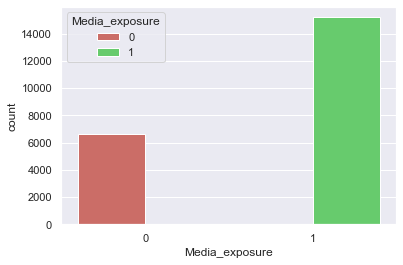

In [128]:
#sns.pairplot(familly,hue='age')
sns.countplot(hue='Media_exposure', x="Media_exposure",data=data)

In [52]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=100)

# fit the model to start training.
model.fit(x_train, y_train.values.ravel())

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')


In [60]:
final_df

,Features,Importances
26,v312,0.000000
51,v812,0.001670
23,currently_pregnant,0.003757
44,v744c,0.003958
46,v744e,0.004157
45,v744d,0.004380
20,v171a,0.005061
27,v501,0.006671
43,v744b,0.006715
42,v744a,0.007121


In [62]:
data.corr(method="spearman")['IPV'].sort_values(ascending=False)# dispay correlation ascending orders

IPV                         1.000000
d101b                       0.120817
wife_afraid_of_husband      0.084677
d101d                       0.079550
d101c                       0.077370
d101e                       0.073583
husband_drinks_alcohol      0.055808
d101a                       0.044043
v812                        0.037250
no_of_other_wives           0.030962
v716                        0.026196
v152                        0.022833
v225                        0.017953
v501                        0.017533
husbands_occupation         0.017260
total_children_ever_born    0.016464
v730                        0.012070
v218                       -0.001190
v822                       -0.018925
v013                       -0.019456
v150                       -0.019903
age_at_Fcohabitatiion      -0.032107
v613                       -0.053349
v745d                      -0.056084
wife_currently_working     -0.059279
v745b                      -0.060031
v137                       -0.062173
d

In [73]:
importance=final_df.nlargest(21,'Importances')
importance


,Features,Importances
19,v152,0.066060
37,v730,0.055228
30,age_at_Fcohabitatiion,0.054899
10,v024,0.047253
31,v613,0.038754
9,v013,0.037725
22,total_children_ever_born,0.036030
36,v716,0.035400
24,v218,0.033128
34,husbands_occupation,0.024210


In [74]:
x_train.shape,x_test.shape

((17468, 55), (4367, 55))

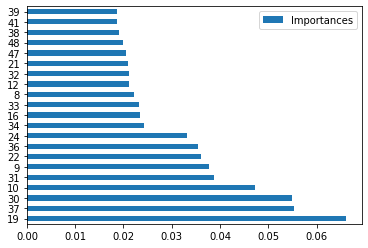

In [75]:
importance.plot.barh()

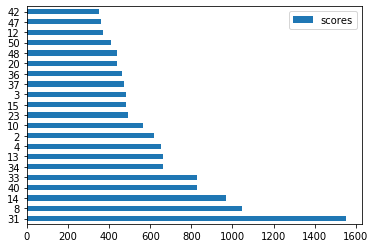

In [76]:
ch_sco.plot.barh()

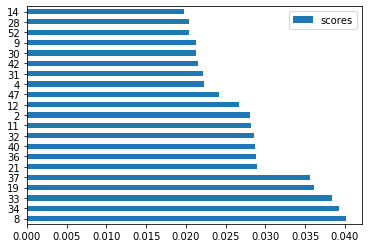

In [77]:
f_mi_score.plot.barh()

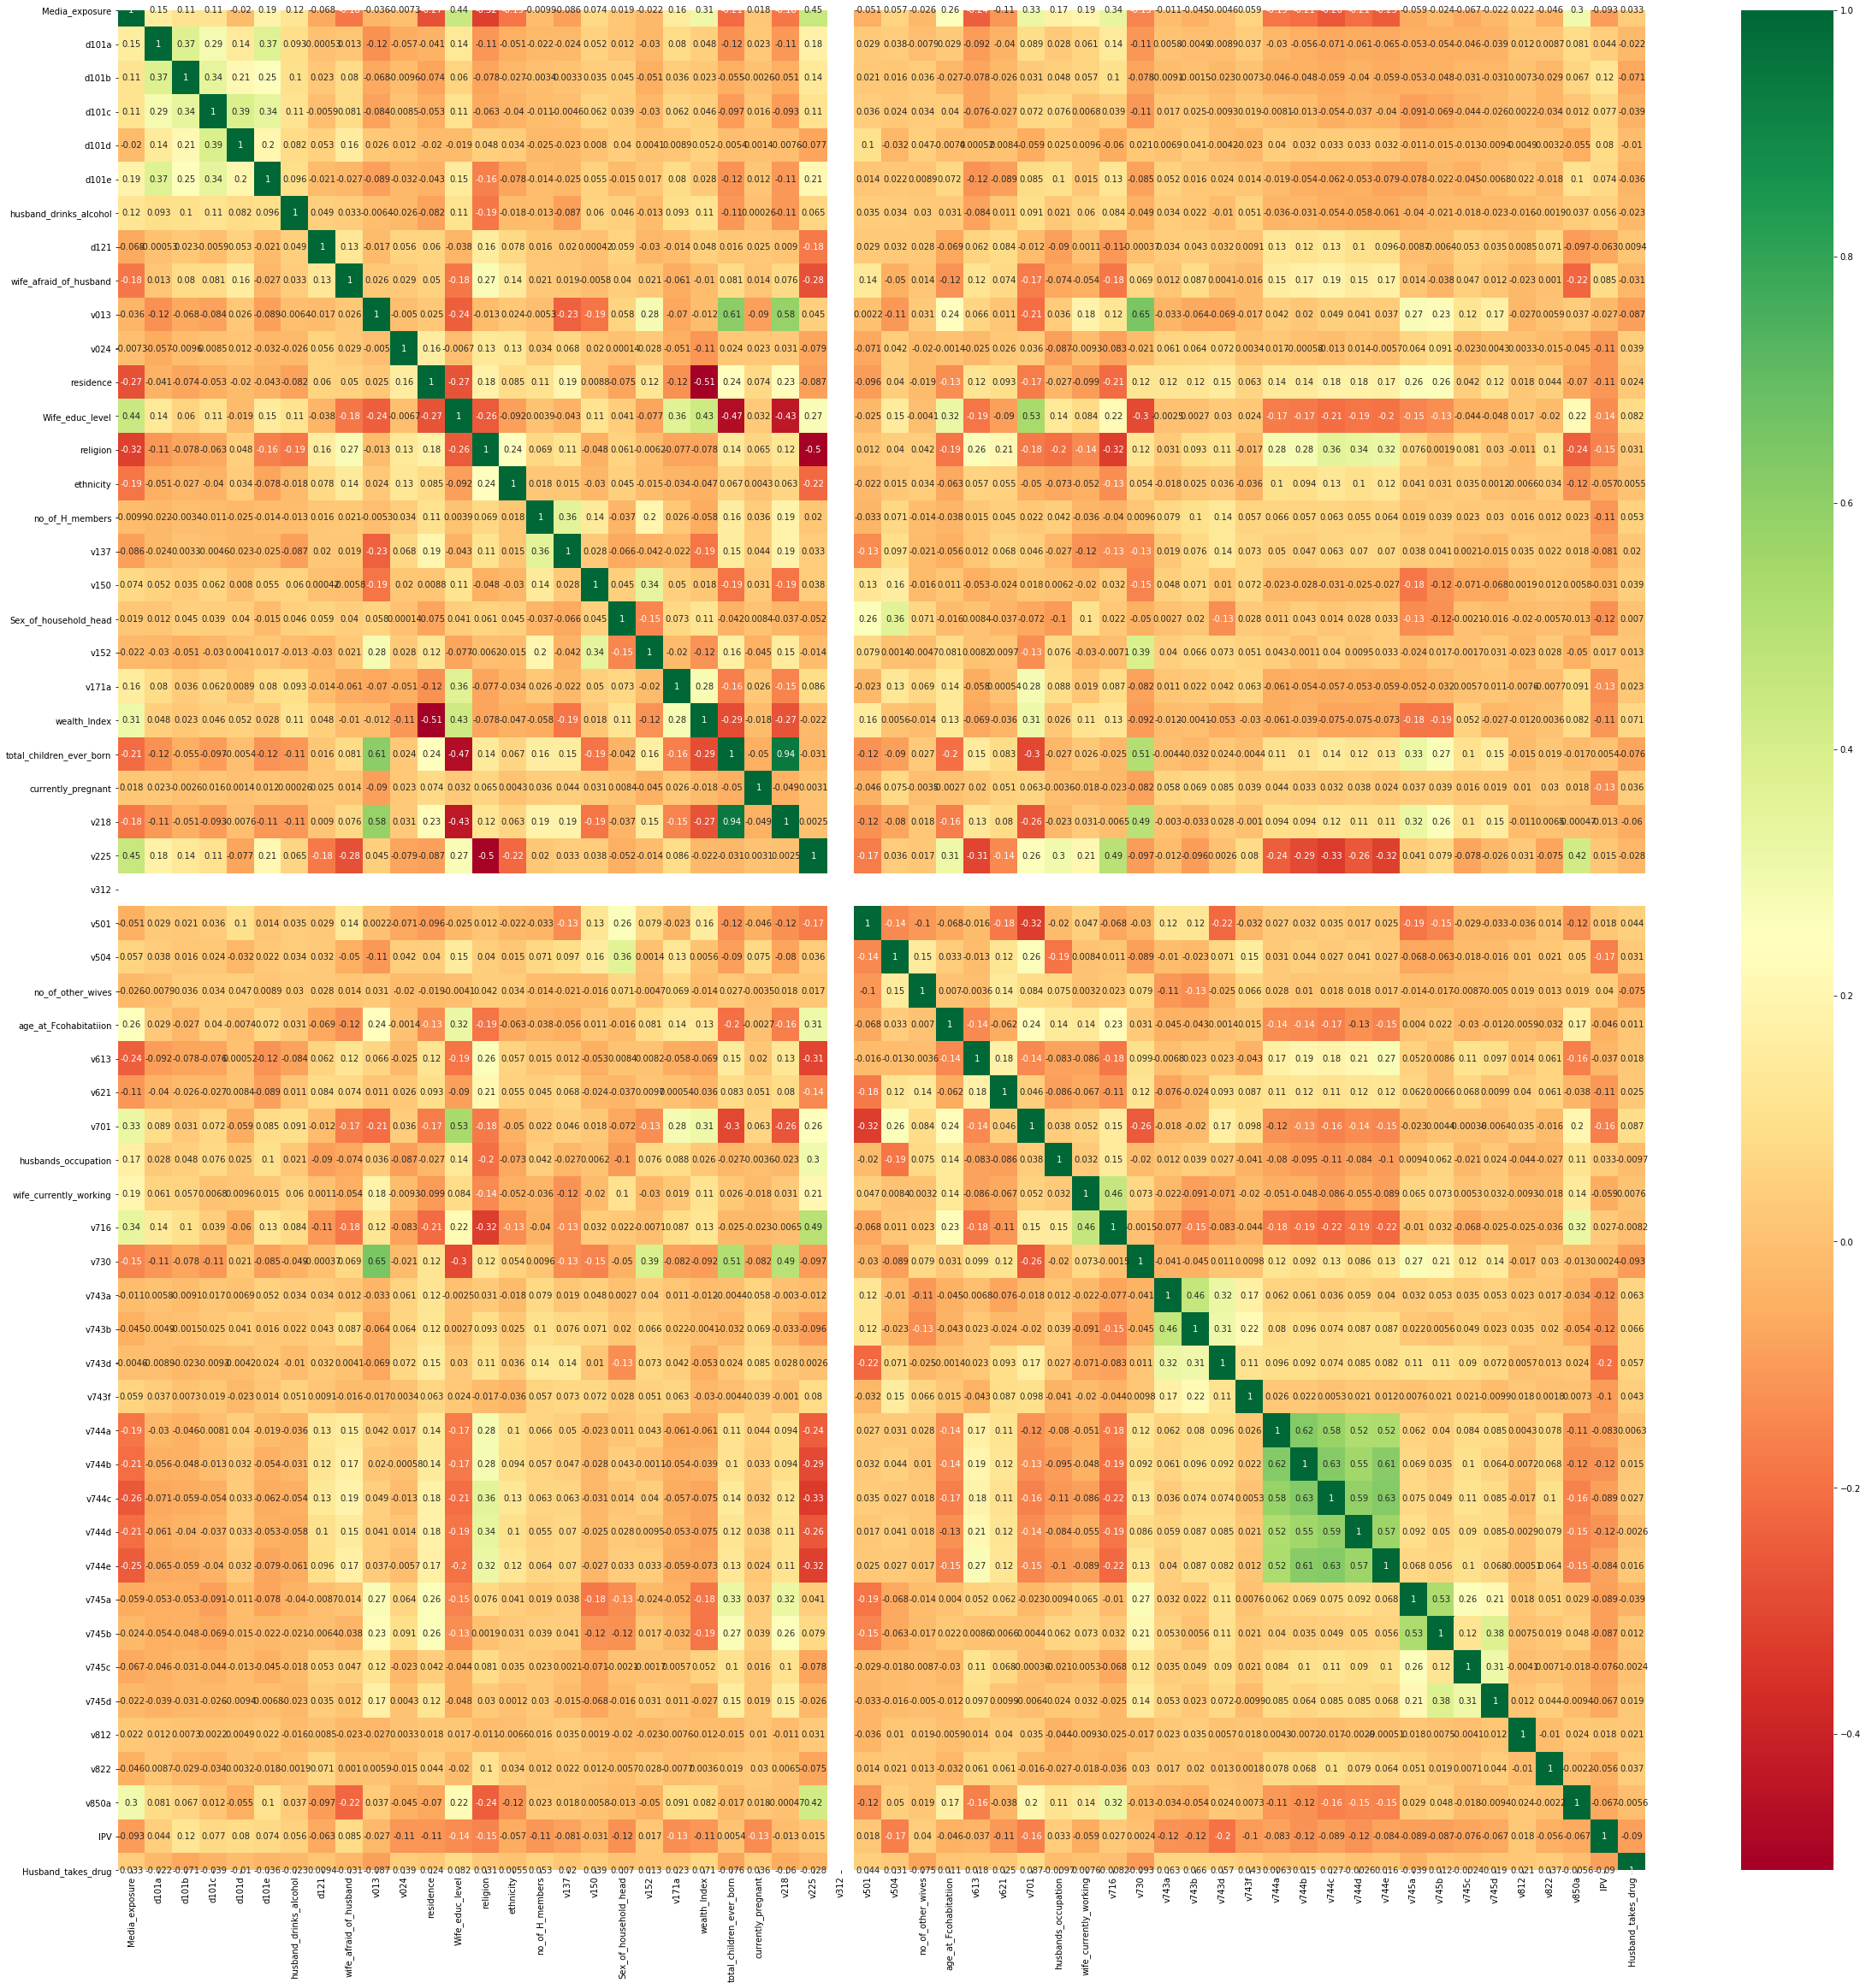

In [78]:
import seaborn as sns
cormatx=data.corr(method="spearman")
top_corr_features=cormatx.index
plt.figure(figsize=(40,40))
corr_heatmap=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig("visualzation.png")

In [79]:
from sklearn.feature_selection import SelectFromModel
clf =SelectFromModel(RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=None))
# Train the classifier
clf.fit(x_train, y_train.values.ravel())
clf.get_support()
selected_feat=x_train.columns[(clf.get_support())]
print("number of features:",len(selected_feat))
print()
print("selected features :",selected_feat)

# Print the name and gini importance of each feature
##for feature in zip(x_train.columns, clf.feature_importances_):
  #  print(feature)

number of features: 21

selected features : Index(['wife_afraid_of_husband', 'v013', 'v024', 'Wife_educ_level', 'v137',
       'v152', 'wealth_Index', 'total_children_ever_born', 'v218',
       'age_at_Fcohabitatiion', 'v613', 'v621', 'v701', 'husbands_occupation',
       'v716', 'v730', 'v743a', 'v743b', 'v743f', 'v745a', 'v745b'],
      dtype='object')


In [80]:
data.columns

Index(['Media_exposure', 'd101a', 'd101b', 'd101c', 'd101d', 'd101e',
       'husband_drinks_alcohol', 'd121', 'wife_afraid_of_husband', 'v013',
       'v024', 'residence', 'Wife_educ_level', 'religion', 'ethnicity',
       'no_of_H_members', 'v137', 'v150', 'Sex_of_household_head', 'v152',
       'v171a', 'wealth_Index', 'total_children_ever_born',
       'currently_pregnant', 'v218', 'v225', 'v312', 'v501', 'v504',
       'no_of_other_wives', 'age_at_Fcohabitatiion', 'v613', 'v621', 'v701',
       'husbands_occupation', 'wife_currently_working', 'v716', 'v730',
       'v743a', 'v743b', 'v743d', 'v743f', 'v744a', 'v744b', 'v744c', 'v744d',
       'v744e', 'v745a', 'v745b', 'v745c', 'v745d', 'v812', 'v822', 'v850a',
       'IPV', 'Husband_takes_drug'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


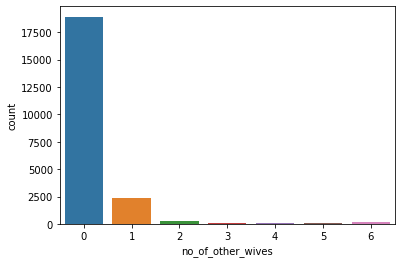

In [86]:
sns.countplot(data['no_of_other_wives'])

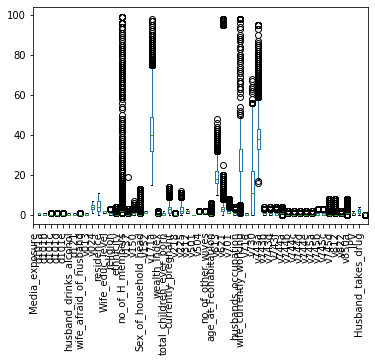

<Figure size 1800x720 with 0 Axes>

In [87]:
data.plot.box()
plt.xticks(list(range(len(data.columns))),data.columns,rotation='vertical')
plt.figure(figsize=(25,10))
plt.show()

In [89]:
data['no_of_H_members'].value_counts()

0     19292
1      2406
2       127
3         9
19        1
Name: no_of_H_members, dtype: int64

In [90]:
df = pd.DataFrame({'mi_best': mi_best,
           'chi_best':chi_best},
       columns=['mi_best', 'chi_best'])
 

In [91]:
df

,mi_best,chi_best
0,d101b,d101b
1,d101d,d101c
2,wife_afraid_of_husband,d101d
3,v013,wife_afraid_of_husband
4,residence,v024
5,Wife_educ_level,Wife_educ_level
6,ethnicity,religion
7,v152,ethnicity
8,wealth_Index,no_of_H_members
9,v504,v171a


In [97]:
importance=final_df.nlargest(18,'Importances')

In [98]:
importance

,Features,Importances
19,v152,0.066060
37,v730,0.055228
30,age_at_Fcohabitatiion,0.054899
10,v024,0.047253
31,v613,0.038754
9,v013,0.037725
22,total_children_ever_born,0.036030
36,v716,0.035400
24,v218,0.033128
34,husbands_occupation,0.024210


In [99]:
ch_sco

,ch_attributes,scores
31,v613,1551.651972
8,wife_afraid_of_husband,1045.003988
14,ethnicity,969.286110
40,v743d,828.144828
33,v701,826.626558
34,husbands_occupation,662.434023
13,religion,661.843473
4,d101d,651.708615
2,d101b,617.279001
10,v024,566.671253


In [101]:
importance=final_df.nlargest(21,'Importances')
importance


,Features,Importances
19,v152,0.066060
37,v730,0.055228
30,age_at_Fcohabitatiion,0.054899
10,v024,0.047253
31,v613,0.038754
9,v013,0.037725
22,total_children_ever_born,0.036030
36,v716,0.035400
24,v218,0.033128
34,husbands_occupation,0.024210


In [102]:
from sklearn.tree import ExtraTreeClassifier
import matplotlib.pyplot as plt

model=ExtraTreeClassifier(criterion='entropy', max_depth=10,
                    max_features=21,max_leaf_nodes=100,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
model.fit(x_train,y_train)


ExtraTreeClassifier(criterion='entropy', max_depth=10, max_features=21,
                    max_leaf_nodes=100)

In [103]:
print(model.feature_importances_)

[0.01862498 0.01734895 0.0284367  0.06000512 0.00497015 0.00531424
 0.01860862 0.00606206 0.15170138 0.01009931 0.00474357 0.05205155
 0.00833596 0.03654915 0.         0.01532138 0.01690086 0.
 0.02513326 0.00659218 0.0177865  0.03296531 0.02369785 0.00618693
 0.00447879 0.00639098 0.         0.02159614 0.08389965 0.01732688
 0.01350918 0.00871658 0.01150162 0.00431843 0.00930355 0.0463115
 0.00703436 0.01957556 0.         0.0302301  0.04351985 0.00439682
 0.0225279  0.01131715 0.         0.         0.         0.01545429
 0.03615424 0.         0.         0.         0.         0.00702238
 0.00797804]


In [104]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train.values.ravel())

# Print the name and gini importance of each feature
for feature in zip(x_train.columns, clf.feature_importances_):
    print(feature)

('Media_exposure', 0.01194492666907378)
('d101a', 0.015635400236731756)
('d101b', 0.013086044204027062)
('d101c', 0.010999544531604162)
('d101d', 0.008744546951938627)
('d101e', 0.016112190422035624)
('husband_drinks_alcohol', 0.014407540481250702)
('d121', 0.007854446335940289)
('wife_afraid_of_husband', 0.022233826999986543)
('v013', 0.0377929897356193)
('v024', 0.04735193392628345)
('residence', 0.015508019292206727)
('Wife_educ_level', 0.021676562397017984)
('religion', 0.011428717845199228)
('ethnicity', 0.017076822569657604)
('no_of_H_members', 0.00882615923412163)
('v137', 0.023020396571154726)
('v150', 0.013020825567077784)
('Sex_of_household_head', 0.014275811529883624)
('v152', 0.06473844914366254)
('v171a', 0.005099046204787763)
('wealth_Index', 0.020754628270144498)
('total_children_ever_born', 0.03508362283089375)
('currently_pregnant', 0.0036821454125988964)
('v218', 0.033473202914629935)
('v225', 0.010153243419393335)
('v312', 0.0)
('v501', 0.006489008494057806)
('v504',

In [105]:
f_score=chi2(x_train,y_train)

In [106]:
f_score

(array([  69.20028723,  135.17665993,  617.27900146,  479.67745061,
         651.70861537,   84.70400792,  134.1426825 ,  152.65556385,
        1045.00398798,  245.71992478,  566.67125332,   76.31183364,
         370.57489633,  661.84347329,  969.28611038,  484.2510837 ,
         234.99504173,  147.91714237,   75.28450664,  151.69897658,
         439.90733353,  271.3690097 ,  140.86697541,  491.14771477,
         162.13326068,   23.31363733,           nan,   48.00137391,
          81.08973893,  311.04884761,  333.24024099, 1551.65197177,
         306.1019897 ,  826.62655765,  662.43402261,  227.27624351,
         460.61054604,  472.02496671,  216.06446152,  217.03903177,
         828.14482776,   91.70119073,  351.74963188,  233.56220691,
         193.51177338,  282.41254723,  139.24336021,  361.08425905,
         436.13643964,  295.67591209,  407.65677112,   15.8160756 ,
         130.76284102,  126.67647806,   28.24400796]),
 array([3.34811453e-014, 3.04096543e-028, 2.82113775e-132, 1.

In [107]:
p_values=pd.Series(f_score[1],index=x_train.columns)


In [108]:
p_values.sort_values(ascending=True,inplace=True)

In [109]:
p_values

v613                         0.000000e+00
wife_afraid_of_husband      6.297752e-225
ethnicity                   1.616265e-208
v743d                       6.148362e-178
v701                        1.311151e-177
husbands_occupation         4.739162e-142
religion                    6.361383e-142
d101d                       9.945497e-140
d101b                       2.821138e-132
v024                        2.527738e-121
currently_pregnant          5.502700e-105
no_of_H_members             1.706255e-103
d101c                       1.663763e-102
v730                        7.513669e-101
v716                         2.207376e-98
v171a                        6.601421e-94
v745b                        4.312755e-93
v745d                        6.163779e-87
Wife_educ_level              6.322186e-79
v745a                        7.088051e-77
v744a                        7.348589e-75
age_at_Fcohabitatiion        7.279931e-71
no_of_other_wives            4.479021e-66
v621                         5.229

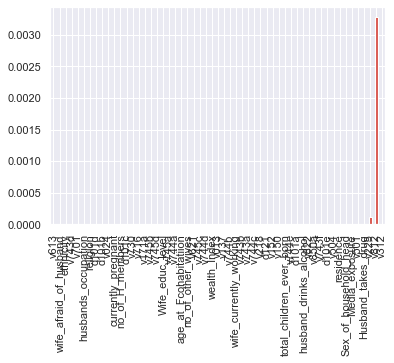

In [110]:
p_values.plot.bar()

In [111]:
p_values=p_values[p_values<0.01]

In [112]:
p_values

v613                         0.000000e+00
wife_afraid_of_husband      6.297752e-225
ethnicity                   1.616265e-208
v743d                       6.148362e-178
v701                        1.311151e-177
husbands_occupation         4.739162e-142
religion                    6.361383e-142
d101d                       9.945497e-140
d101b                       2.821138e-132
v024                        2.527738e-121
currently_pregnant          5.502700e-105
no_of_H_members             1.706255e-103
d101c                       1.663763e-102
v730                        7.513669e-101
v716                         2.207376e-98
v171a                        6.601421e-94
v745b                        4.312755e-93
v745d                        6.163779e-87
Wife_educ_level              6.322186e-79
v745a                        7.088051e-77
v744a                        7.348589e-75
age_at_Fcohabitatiion        7.279931e-71
no_of_other_wives            4.479021e-66
v621                         5.229

In [58]:
#def run_randomForest(x_train_mi_fc,x_test_mi_fc,y_train,y_test):
#import Decision tree classifiers classifier from sklearn_tree

#deterimne the paramets in Decision tree classifiers

#fit the train in case of mutual info classifiers

#predict the model

#display the accuracy of the model in case of DT
from sklearn.tree import DecisionTreeClassifier
dt_mi=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=28,random_state=123)
dt_mui=dt_mi.fit(x_train_mi_fc,y_train.values.ravel())
dt_mi=dt_mui.predict(x_test_mi_fc)
print((metrics.accuracy_score(y_test,dt_mi)))

0.3702770780856423


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

#### Wrapper Method

In [90]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [91]:
# create the SequentialFeatureSelector object, and configure the parameters.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sfs = SFS(RandomForestClassifier(max_depth=10,max_leaf_nodes=50,criterion='entropy',n_estimators=100), 
           k_features=21, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=10)

In [92]:
# fit the object to the training data.
sfs = sfs.fit(x_train,y_train.values.ravel())

In [93]:
# print the selected features.
sfs_featueres = x_train.columns[list(sfs.k_feature_idx_)] 
print(sfs_featueres)

Index(['Media_usage', 'husband_drinks_alcohol', 'wife_afraid of hasband',
       'v024', 'residence', 'religion', 'Ethnicity', 'Sex_of_household_head',
       'v152', 'age_at_first_cohabitatiion', 'v613', 'v701',
       'husbands_occupation', 'v716', 'v730', 'v743b', 'v743d', 'v744e',
       'v745d', 'v822', 'v850a'],
      dtype='object')


In [ ]:
# print the final prediction score.
print(sfs.k_score_)
# transform to the newly selected features.
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

In [95]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.28105323411562677, 0.2690326273611906, 0.27...",0.270952,"(wife_afraid of hasband,)",0.00567069,0.0076351,0.00254503
2,"(8, 40)","[0.3291356611333715, 0.31883228391528334, 0.30...",0.312628,"(wife_afraid of hasband, v743d)",0.00757922,0.0102048,0.00340159
3,"(8, 37, 40)","[0.35088723526044646, 0.34344590726960506, 0.3...",0.342454,"(wife_afraid of hasband, v730, v743d)",0.00813814,0.0109573,0.00365244
4,"(8, 30, 37, 40)","[0.38294218660560964, 0.3697767601602748, 0.37...",0.370047,"(wife_afraid of hasband, age_at_first_cohabita...",0.00872812,0.0117517,0.00391722
5,"(8, 10, 30, 37, 40)","[0.4098454493417287, 0.41785918717801945, 0.39...",0.396897,"(wife_afraid of hasband, v024, age_at_first_co...",0.008734,0.0117596,0.00391986
6,"(8, 10, 30, 34, 37, 40)","[0.42301087578706353, 0.4275901545506583, 0.40...",0.41682,"(wife_afraid of hasband, v024, age_at_first_co...",0.00643265,0.00866102,0.00288701
7,"(8, 10, 30, 31, 34, 37, 40)","[0.44476244991413855, 0.45105895821408126, 0.4...",0.431875,"(wife_afraid of hasband, v024, age_at_first_co...",0.00983361,0.0132401,0.00441337
8,"(0, 8, 10, 30, 31, 34, 37, 40)","[0.4625071551230681, 0.45735546651402403, 0.44...",0.444412,"(Media_usage, wife_afraid of hasband, v024, ag...",0.0102679,0.0138249,0.0046083
9,"(0, 8, 10, 19, 30, 31, 34, 37, 40)","[0.4636519748139668, 0.4625071551230681, 0.439...",0.447217,"(Media_usage, wife_afraid of hasband, v024, v1...",0.0096882,0.0130443,0.00434811
10,"(0, 8, 10, 19, 30, 31, 33, 34, 37, 40)","[0.48082427017744706, 0.4693760732684602, 0.44...",0.4609,"(Media_usage, wife_afraid of hasband, v024, v1...",0.00867024,0.0116737,0.00389125


In [96]:
sfs_featueres

Index(['Media_usage', 'husband_drinks_alcohol', 'wife_afraid of hasband',
       'v024', 'residence', 'religion', 'Ethnicity', 'Sex_of_household_head',
       'v152', 'age_at_first_cohabitatiion', 'v613', 'v701',
       'husbands_occupation', 'v716', 'v730', 'v743b', 'v743d', 'v744e',
       'v745d', 'v822', 'v850a'],
      dtype='object')

In [105]:
#sfs_featueres = sfs_featueres.rename(columns={'Media_usage': 'Media_exposure' })